## 底层结构

### dataframe

In [1]:
import pandas as pd
df = pd.DataFrame({})

# 可视化
df.plot
# 索引
df.iloc
df[::2]
# 分组
df.groupby
# 合并
df.merge

<bound method DataFrame.merge of Empty DataFrame
Columns: []
Index: []>

### parquet文件格式

In [2]:
import pyarrow.parquet as pq

# 存储
pq.write_table
# 读取
# pq.read_table().to_pandas()

<function pyarrow.parquet.core.write_table(table, where, row_group_size=None, version='2.6', use_dictionary=True, compression='snappy', write_statistics=True, use_deprecated_int96_timestamps=None, coerce_timestamps=None, allow_truncated_timestamps=False, data_page_size=None, flavor=None, filesystem=None, compression_level=None, use_byte_stream_split=False, column_encoding=None, data_page_version='1.0', use_compliant_nested_type=True, encryption_properties=None, write_batch_size=None, dictionary_pagesize_limit=None, store_schema=True, write_page_index=False, write_page_checksum=False, sorting_columns=None, store_decimal_as_integer=False, **kwargs)>

### frame & agent parquet

In [3]:
import pyarrow.parquet as pq
from trajcaching.common.parquet_utils import read_pd

# 临时路径
# frame.parquet: /tmp/feature_bmk/pp_ci/23603589/5805274/v1-agent.parquet
# agent.parquet: /tmp/feature_bmk/pp_ci/23603589/5805274/v1-agent.parquet
# frame_pd_path = '/tmp/feature_bmk/pp_ci/23603589/5805274/v1-agent.parquet'
# agent_pd_path = '/tmp/feature_bmk/pp_ci/23603589/5805274/v1-agent.parquet'
frame_pd_path = '/mnt/csi-data-aly/shared/shenzhen/ppsim/trajcaching_v3/parquet_frame/1742883119.317035/28012888/5960321/v1-frame.parquet'
agent_pd_path = '/mnt/csi-data-aly/shared/shenzhen/ppsim/trajcaching_v3/parquet_frame/1742883119.317035/28012888/5960321/v1-agent.parquet'

# 使用 pyarrow.parquet 直接读取 Parquet 文件为 pandas DataFrame
frame_pd = pq.read_table(frame_pd_path).to_pandas()
agent_pd = pq.read_table(agent_pd_path).to_pandas()

frame_pd.head(3)

,timestamp,pos_x,pos_y,pos_z,roll,pitch,heading,length,width,height,...,feature_map_pos_x,feature_map_pos_y,feature_map_heading,agent_id,agent_type,vel_x,vel_y,acc_x,acc_y,frame_meta
0,1745738623600000,118.394200,12.271963,-9.586056,0.017476,0.004273,-1.235023,5.0,3.0,2.0,...,118.592598,11.779677,-1.234977,0,5,2.937194,-8.440646,-0.001784,-0.009843,"{'acc_x': -0.0017835657820964332, 'acc_y': -0...."
1,1745738623700000,118.688856,11.428543,-9.589886,0.017161,0.003891,-1.234972,5.0,3.0,2.0,...,118.880660,10.954202,-1.234989,0,5,2.936596,-8.441962,-0.001039,-0.011554,"{'acc_x': -0.0010391901730914276, 'acc_y': -0...."
2,1745738623800000,118.982766,10.584477,-9.594042,0.017576,0.003714,-1.235027,5.0,3.0,2.0,...,119.175080,10.109937,-1.235088,0,5,2.940355,-8.443378,0.002612,-0.017868,"{'acc_x': 0.002612095132075755, 'acc_y': -0.01..."


In [4]:
# 查看原始frame和agent dataframe的信息
frame_pd = read_pd(frame_pd_path)
agent_pd = read_pd(agent_pd_path)
print("原始的frame.dataframe一共包含 {} 个特征信息，详细的特征标签包括:".format(len(frame_pd.columns)), frame_pd.columns, sep='\n')
print("原始的agent.dataframe一共包含 {} 个特征信息，详细的特征标签包括:".format(len(agent_pd.columns)), agent_pd.columns, sep='\n')

原始的frame.dataframe一共包含 38 个特征信息，详细的特征标签包括:
Index(['timestamp', 'pos_x', 'pos_y', 'pos_z', 'roll', 'pitch', 'heading',
       'length', 'width', 'height', 'trip_id', 'item_id', 'bag_name',
       'car_timestamp', 'car_pos_x', 'car_pos_y', 'car_heading', 'car_vel_x',
       'car_vel_y', 'car_acc_x', 'car_acc_y', 'car_flu_vel_x', 'car_flu_vel_y',
       'car_flu_acc_x', 'car_flu_acc_y', 'front_wheel_angle', 'driving_mode',
       'feature_map_timestamp', 'feature_map_pos_x', 'feature_map_pos_y',
       'feature_map_heading', 'agent_id', 'agent_type', 'vel_x', 'vel_y',
       'acc_x', 'acc_y', 'frame_meta'],
      dtype='object')
原始的agent.dataframe一共包含 15 个特征信息，详细的特征标签包括:
Index(['agent_id', 'timestamp', 'agent_type', 'pos_x', 'pos_y', 'pos_z',
       'heading', 'vel_x', 'vel_y', 'acc_x', 'acc_y', 'length', 'width',
       'height', 'frame_meta'],
      dtype='object')


#### 查看frame.dataframe原始信息

In [5]:
frame_pd.head(4)

,timestamp,pos_x,pos_y,pos_z,roll,pitch,heading,length,width,height,...,feature_map_pos_x,feature_map_pos_y,feature_map_heading,agent_id,agent_type,vel_x,vel_y,acc_x,acc_y,frame_meta
0,1745738623600000,118.394200,12.271963,-9.586056,0.017476,0.004273,-1.235023,5.0,3.0,2.0,...,118.592598,11.779677,-1.234977,0,5,2.937194,-8.440646,-0.001784,-0.009843,"{'acc_x': -0.0017835657820964332, 'acc_y': -0...."
1,1745738623700000,118.688856,11.428543,-9.589886,0.017161,0.003891,-1.234972,5.0,3.0,2.0,...,118.880660,10.954202,-1.234989,0,5,2.936596,-8.441962,-0.001039,-0.011554,"{'acc_x': -0.0010391901730914276, 'acc_y': -0...."
2,1745738623800000,118.982766,10.584477,-9.594042,0.017576,0.003714,-1.235027,5.0,3.0,2.0,...,119.175080,10.109937,-1.235088,0,5,2.940355,-8.443378,0.002612,-0.017868,"{'acc_x': 0.002612095132075755, 'acc_y': -0.01..."
3,1745738623900000,119.276650,9.740200,-9.597830,0.017809,0.003694,-1.235117,5.0,3.0,2.0,...,119.469140,9.265821,-1.235184,0,5,2.939943,-8.442750,0.004209,-0.016918,"{'acc_x': 0.00420866543281947, 'acc_y': -0.016..."


In [6]:
# timestamp: 当前帧的全局时间戳
# pos_x, pos_y, pos_z: 自车在全局地图下的XYZ位置
# roll, pitch, heading: 自车的欧拉角：翻滚、俯仰、航向（单位：弧度）
# length, width, height: 自车轮廓的长宽高（单位：米）
frame_pd.iloc[:5,0:10]

,timestamp,pos_x,pos_y,pos_z,roll,pitch,heading,length,width,height
0,1745738623600000,118.394200,12.271963,-9.586056,0.017476,0.004273,-1.235023,5.0,3.0,2.0
1,1745738623700000,118.688856,11.428543,-9.589886,0.017161,0.003891,-1.234972,5.0,3.0,2.0
2,1745738623800000,118.982766,10.584477,-9.594042,0.017576,0.003714,-1.235027,5.0,3.0,2.0
3,1745738623900000,119.276650,9.740200,-9.597830,0.017809,0.003694,-1.235117,5.0,3.0,2.0
4,1745738624000000,119.570433,8.895705,-9.601361,0.018062,0.003842,-1.235265,5.0,3.0,2.0


In [7]:
# trip_id, item_id, bag_name: 本次采集任务对应的trip、item和原始bag_name
frame_pd.iloc[:5, 10:13]

,trip_id,item_id,bag_name
0,28012888,5960321,YR-C01-A63355276832_20250427_072345.Light_Topi...
1,28012888,5960321,YR-C01-A63355276832_20250427_072345.Light_Topi...
2,28012888,5960321,YR-C01-A63355276832_20250427_072345.Light_Topi...
3,28012888,5960321,YR-C01-A63355276832_20250427_072345.Light_Topi...
4,28012888,5960321,YR-C01-A63355276832_20250427_072345.Light_Topi...


In [8]:
# car_timestamp: 自车canbus时间戳
# car_pos_x, car_pos_y, car_heading：全局坐标系或者局部高精地图下的自车位置和航向
# car_vel_x, car_vel_y: 自车在X和Y方向的速度
# car_acc_x	car_acc_y: 自车在X和Y方向的加速度
# car_flu_vel_x, car_flu_vel_y, car_flu_acc_x, car_flu_acc_y: 自车在车体坐标系下的速度和加速度（FLU: Forward-Left-Up）
frame_pd.iloc[:5, 13:25]

,car_timestamp,car_pos_x,car_pos_y,car_heading,car_vel_x,car_vel_y,car_acc_x,car_acc_y,car_flu_vel_x,car_flu_vel_y,car_flu_acc_x,car_flu_acc_y
0,1745738623618441,117.860835,13.877127,-1.235042,2.937194,-8.440646,-0.001784,-0.009843,8.937091,-0.002479,0.008708,-0.004922
1,1745738623718535,117.938322,13.654828,-1.234971,2.936596,-8.441962,-0.001039,-0.011554,8.938137,-0.004112,0.010569,-0.004782
2,1745738623818234,118.237844,12.795915,-1.235007,2.940355,-8.443378,0.002612,-0.017868,8.940711,-0.000706,0.017733,-0.003411
3,1745738623918133,118.531851,11.953555,-1.235101,2.939943,-8.442750,0.004209,-0.016918,8.939982,-0.000044,0.017361,-0.001589
4,1745738624018267,118.823263,11.117808,-1.235227,2.936843,-8.444140,-0.004974,-0.018767,8.940276,-0.002304,0.016089,-0.010867


In [9]:
# front_wheel_angle	: 前转轮角
# driving_mode: 驾驶模式
# feature_map_timestamp：地图坐标系下的定位位置
# feature_map_pos_x, feature_map_pos_y, feature_map_heading: 地图坐标系下的定位位置和航向角
frame_pd.iloc[:, 25:31]

,front_wheel_angle,driving_mode,feature_map_timestamp,feature_map_pos_x,feature_map_pos_y,feature_map_heading
0,-0.000601,0,1.745739e+15,118.592598,11.779677,-1.234977
1,-0.000601,0,1.745739e+15,118.880660,10.954202,-1.234989
2,-0.000601,0,1.745739e+15,119.175080,10.109937,-1.235088
3,-0.000601,0,1.745739e+15,119.469140,9.265821,-1.235184
4,-0.000601,0,1.745739e+15,119.763176,8.421543,-1.235355
...,...,...,...,...,...,...
144,-0.002172,0,1.745739e+15,121.862364,2.386889,-1.237663
145,-0.002172,0,1.745739e+15,121.750994,2.710531,-1.237203
146,-0.002172,0,1.745739e+15,121.699831,2.858711,-1.237070
147,-0.002106,0,1.745739e+15,121.699831,2.858711,-1.237070


In [10]:
# agent_id: 自车的id统一设为0
# agent_type: 自车类型标记，通常为5
# vel_x，vel_y，acc_x，acc_y：自车的速度/加速度，用于统一 agent 字段结构
frame_pd.iloc[:, 31:-1]

,agent_id,agent_type,vel_x,vel_y,acc_x,acc_y
0,0,5,2.937194,-8.440646,-0.001784,-0.009843
1,0,5,2.936596,-8.441962,-0.001039,-0.011554
2,0,5,2.940355,-8.443378,0.002612,-0.017868
3,0,5,2.939943,-8.442750,0.004209,-0.016918
4,0,5,2.936843,-8.444140,-0.004974,-0.018767
...,...,...,...,...,...,...
144,0,5,-0.579871,1.687366,0.104096,-0.315367
145,0,5,-0.558053,1.622636,0.147607,-0.428595
146,0,5,-0.532075,1.546013,0.191653,-0.557440
147,0,5,-0.494157,1.435049,0.259127,-0.749934


In [11]:
# 当前帧的元信息（字段聚合成的字典，用于 trace/debug）
frame_pd.iloc[:, -1][0]

{'acc_x': -0.0017835657820964332,
 'acc_y': -0.00984277345910926,
 'agent_id': 0,
 'agent_type': 5,
 'bag_name': 'YR-C01-A63355276832_20250427_072345.Light_Topic_Group.bag',
 'car_acc_x': -0.0017835657820964332,
 'car_acc_y': -0.00984277345910926,
 'car_flu_acc_x': 0.008708480397945681,
 'car_flu_acc_y': -0.004921754303600166,
 'car_flu_vel_x': 8.937091144670244,
 'car_flu_vel_y': -0.0024791658408702144,
 'car_heading': -1.2350420939924724,
 'car_pos_x': 117.86083496698122,
 'car_pos_y': 13.87712745121399,
 'car_timestamp': 1745738623618441,
 'car_vel_x': 2.9371935096286594,
 'car_vel_y': -8.440645624678355,
 'driving_mode': 0,
 'feature_map_heading': -1.2349774837493896,
 'feature_map_pos_x': 118.59259756170387,
 'feature_map_pos_y': 11.779677282654196,
 'feature_map_timestamp': 1745738623657799.0,
 'front_wheel_angle': -0.0006008336204104125,
 'heading': -1.2350225448608394,
 'height': 2.0,
 'item_id': '5960321',
 'length': 5.0,
 'pitch': 0.004273043945431707,
 'pos_x': 118.394199611

<Axes: xlabel='timestamp'>

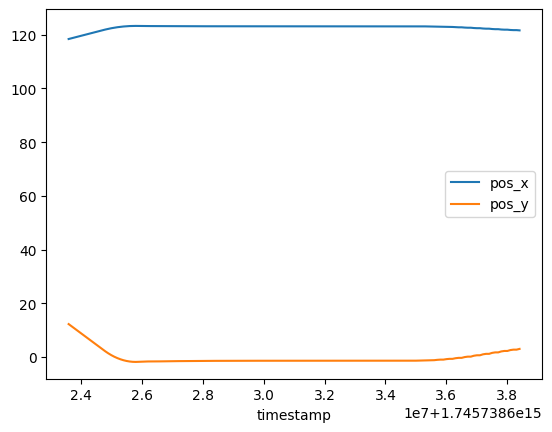

In [12]:
# plot visualize
frame_pd.loc[:, ['timestamp', 'pos_x', 'pos_y']].plot(x='timestamp')

#### 查看原始agent.dataframe信息

In [13]:
agent_pd.head()

,agent_id,timestamp,agent_type,pos_x,pos_y,pos_z,heading,vel_x,vel_y,acc_x,acc_y,length,width,height,frame_meta
3546,0,1745738623600000,5,118.394200,12.271963,-9.586056,-1.235023,2.937194,-8.440646,-0.001784,-0.009843,5.000000,3.000000,2.000000,"{'acc_x': -0.0017835657820964332, 'acc_y': -0...."
3547,0,1745738623700000,5,118.688856,11.428543,-9.589886,-1.234972,2.936596,-8.441962,-0.001039,-0.011554,5.000000,3.000000,2.000000,"{'acc_x': -0.0010391901730914276, 'acc_y': -0...."
3548,0,1745738623800000,5,118.982766,10.584477,-9.594042,-1.235027,2.940355,-8.443378,0.002612,-0.017868,5.000000,3.000000,2.000000,"{'acc_x': 0.002612095132075755, 'acc_y': -0.01..."
26,40,1745738623800000,3,135.896721,-18.344793,-10.615686,0.345716,0.199320,-0.018038,0.027937,0.037211,0.739243,0.748208,1.719746,"{'acc_x': None, 'acc_y': None, 'agent_id': Non..."
25,39,1745738623800000,3,131.488434,2.765511,-10.620071,0.601708,0.181927,0.287479,0.038773,0.061283,0.718145,0.705566,1.738996,"{'acc_x': None, 'acc_y': None, 'agent_id': Non..."


In [14]:
# agent_id: 每个 agent（车/人/非机动车）唯一 ID（帧内唯一）
# timestamp: 当前帧的时间戳（与 frame_pd 对齐）
# agent_type: 目标类型：车辆、人、卡车、自车（值：0~5）
agent_pd.iloc[:5, :3]

,agent_id,timestamp,agent_type
3546,0,1745738623600000,5
3547,0,1745738623700000,5
3548,0,1745738623800000,5
26,40,1745738623800000,3
25,39,1745738623800000,3


In [15]:
# pos_x, pos_y, pos_z: agent 在世界坐标系下的位置
# heading: 航向角
agent_pd.iloc[:5, 3:7]

,pos_x,pos_y,pos_z,heading
3546,118.394200,12.271963,-9.586056,-1.235023
3547,118.688856,11.428543,-9.589886,-1.234972
3548,118.982766,10.584477,-9.594042,-1.235027
26,135.896721,-18.344793,-10.615686,0.345716
25,131.488434,2.765511,-10.620071,0.601708


In [16]:
# vel_x, vel_y: agent 的速度向量
# acc_x, acc_y: agent 的加速度向量
agent_pd.iloc[:5, 7:11]

,vel_x,vel_y,acc_x,acc_y
3546,2.937194,-8.440646,-0.001784,-0.009843
3547,2.936596,-8.441962,-0.001039,-0.011554
3548,2.940355,-8.443378,0.002612,-0.017868
26,0.199320,-0.018038,0.027937,0.037211
25,0.181927,0.287479,0.038773,0.061283


In [17]:
# agent的边框尺寸
agent_pd.iloc[:5, 11:-1]

,length,width,height
3546,5.000000,3.000000,2.000000
3547,5.000000,3.000000,2.000000
3548,5.000000,3.000000,2.000000
26,0.739243,0.748208,1.719746
25,0.718145,0.705566,1.738996


In [18]:
# 对应帧的元信息，继承自 frame_pd，用于补充上下文
agent_pd.iloc[:, -1][3546]

{'acc_x': -0.0017835657820964332,
 'acc_y': -0.00984277345910926,
 'agent_id': 0.0,
 'agent_type': 5.0,
 'bag_name': 'YR-C01-A63355276832_20250427_072345.Light_Topic_Group.bag',
 'car_acc_x': -0.0017835657820964332,
 'car_acc_y': -0.00984277345910926,
 'car_flu_acc_x': 0.008708480397945681,
 'car_flu_acc_y': -0.004921754303600166,
 'car_flu_vel_x': 8.937091144670244,
 'car_flu_vel_y': -0.0024791658408702144,
 'car_heading': -1.2350420939924724,
 'car_pos_x': 117.86083496698122,
 'car_pos_y': 13.87712745121399,
 'car_timestamp': 1745738623618441.0,
 'car_vel_x': 2.9371935096286594,
 'car_vel_y': -8.440645624678355,
 'driving_mode': 0.0,
 'feature_map_heading': -1.2349774837493896,
 'feature_map_pos_x': 118.59259756170387,
 'feature_map_pos_y': 11.779677282654196,
 'feature_map_timestamp': 1745738623657799.0,
 'front_wheel_angle': -0.0006008336204104125,
 'heading': -1.2350225448608394,
 'height': 2.0,
 'item_id': '5960321',
 'length': 5.0,
 'pitch': 0.004273043945431707,
 'pos_x': 118.3

In [19]:
# group
agent_groups = agent_pd.groupby('agent_id')
# group keys
# agent_groups.groups.keys()
agent_groups.get_group(0)

,agent_id,timestamp,agent_type,pos_x,pos_y,pos_z,heading,vel_x,vel_y,acc_x,acc_y,length,width,height,frame_meta
3546,0,1745738623600000,5,118.394200,12.271963,-9.586056,-1.235023,2.937194,-8.440646,-0.001784,-0.009843,5.0,3.0,2.0,"{'acc_x': -0.0017835657820964332, 'acc_y': -0...."
3547,0,1745738623700000,5,118.688856,11.428543,-9.589886,-1.234972,2.936596,-8.441962,-0.001039,-0.011554,5.0,3.0,2.0,"{'acc_x': -0.0010391901730914276, 'acc_y': -0...."
3548,0,1745738623800000,5,118.982766,10.584477,-9.594042,-1.235027,2.940355,-8.443378,0.002612,-0.017868,5.0,3.0,2.0,"{'acc_x': 0.002612095132075755, 'acc_y': -0.01..."
3549,0,1745738623900000,5,119.276650,9.740200,-9.597830,-1.235117,2.939943,-8.442750,0.004209,-0.016918,5.0,3.0,2.0,"{'acc_x': 0.00420866543281947, 'acc_y': -0.016..."
3550,0,1745738624000000,5,119.570433,8.895705,-9.601361,-1.235265,2.936843,-8.444140,-0.004974,-0.018767,5.0,3.0,2.0,"{'acc_x': -0.004974043952113331, 'acc_y': -0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3690,0,1745738638000000,5,121.873889,2.266088,-9.680856,-1.237742,-0.579871,1.687366,0.104096,-0.315367,5.0,3.0,2.0,"{'acc_x': 0.10409585185332715, 'acc_y': -0.315..."
3691,0,1745738638100000,5,121.759129,2.598728,-9.677419,-1.237357,-0.558053,1.622636,0.147607,-0.428595,5.0,3.0,2.0,"{'acc_x': 0.14760726147872577, 'acc_y': -0.428..."
3692,0,1745738638200000,5,121.705993,2.754062,-9.675635,-1.237129,-0.532075,1.546013,0.191653,-0.557440,5.0,3.0,2.0,"{'acc_x': 0.191653093420121, 'acc_y': -0.55744..."
3693,0,1745738638300000,5,121.705993,2.754062,-9.675635,-1.237129,-0.494157,1.435049,0.259127,-0.749934,5.0,3.0,2.0,"{'acc_x': 0.25912731319445353, 'acc_y': -0.749..."


In [20]:
# merge

import pandas as pd

# 创建示例 DataFrame
data1 = {
    'timestamp_us': [1000, 2000, 3000, 4000],
    'agent_id': [1, 2, 1, 2],
    'value1': [10, 20, 30, 40]
}

data2 = {
    'timestamp_us': [1000, 2000, 3000, 5000],
    'agent_id': [1, 2, 1, 3],
    'value2': [100, 200, 300, 500]
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
# 按照 'timestamp_us' 和 'agent_id' 列进行合并
merged_df = pd.merge(df1, df2, on=['timestamp_us', 'agent_id'], how='outer')

### 查看camera_data数据

In [21]:
# camera_parameters.path: /tmp/feature_bmk/pp_ci/23603589/camera_parameters.pkl
# lidar_vehicle.path: /tmp/feature_bmk/pp_ci/23603589/lidar_vehicle.pkl

# camera_data_path = '/tmp/feature_bmk/pp_ci/23603589/camera_parameters.pkl'
camera_data_path = '/mnt/csi-data-aly/shared/shenzhen/ppsim/trajcaching_v3/parquet_frame/1742883119.317035/28012888/camera_parameters.pkl'
import pickle
with open(camera_data_path, "rb") as f:
    camera_data = pickle.load(f)
camera_data

{'raw_image.camera1.coeff.extrinsic': array([[-0.00515528, -0.99998543,  0.00161989, -0.09783297],
        [ 0.01749421, -0.00170988, -0.99984554, -0.24592808],
        [ 0.99983371, -0.00512611,  0.01750274, -0.57298136],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'raw_image.camera1.coeff.intrinsic': array([[1.9123588e+03, 0.0000000e+00, 1.9259814e+03, 0.0000000e+00],
        [0.0000000e+00, 1.9118584e+03, 1.0810054e+03, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00]]),
 'raw_image.camera1.coeff.distortion': array([-0.0279075, -0.0100474,  0.002644 ,  0.0001893]),
 'raw_image.camera1.coeff.image_size': array([2160, 3840], dtype=int32)}

In [22]:
lidar_data_path = '/mnt/csi-data-aly/shared/shenzhen/ppsim/trajcaching_v3/parquet_frame/1742883119.317035/28012888/lidar_vehicle.pkl'
import pickle
with open(lidar_data_path, "rb") as f:
    lidar_data = pickle.load(f)
lidar_data

{'lidar_cfg': {'vehicleToSensing': {'position': {'x': 1.5195,
    'y': 0.0,
    'z': 1.445},
   'orientation': {'qx': 0.0, 'qy': 0.0, 'qz': 0.0, 'qw': 1.0}},
  'config': [{'frameId': 'at128_202',
    'model': 'HS_AT128_SOLID',
    'sensorToLidar': [{'position': {'x': 0.38074544,
       'y': 0.030926064,
       'z': -0.11},
      'orientation': {'qx': -0.0052244323,
       'qy': 0.004586269,
       'qz': 5.5736804e-05,
       'qw': 0.99997586}}],
    'ringIdStart': 0,
    'ringIdEnd': 1,
    'installAngleError': {'x': -0.5986807,
     'y': 0.525552,
     'z': 0.0063870186}}]},
 'vehicle_cfg': {'vehicleParam': {'frontEdgeToCenter': 4.024,
   'backEdgeToCenter': 1.118,
   'leftEdgeToCenter': 1.107,
   'rightEdgeToCenter': 1.107,
   'length': 5.142,
   'width': 1.975,
   'height': 1.827,
   'maxAcceleration': 5.0,
   'maxDeceleration': -5.0,
   'maxSteerAngle': 465.0,
   'steerRatio': 21.5,
   'wheelBase': 3.039,
   'wheelRollingRadius': 0.371,
   'rearAxisLength': 1.691,
   'rearLeftRadiu

### record数据